# Waste classification by building convolutional neural network(CNN) using TensorFlow

In [1]:
#here we are employing binary image classification as there are only 2 classes

In [2]:
#using cnn to solve this problem

In [3]:
#tensorflow is an end-to end open source machine learing platform

In [ ]:
#load the dependencies and explore the directories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #mpimg is a python file or
#module containing functions, classes from matplotlib.image package
#this module provides functions for reading, displaying and 
#manipulating image using matplotlib
import os #The os module provides a way to interact with
#operating system to perform various operations such as
#accessing files and directories, manipulating paths etc
import cv2

In [2]:
for dir_path, dir_names, filenames in os.walk(r"C:\Users\User\Downloads\archive\DATASET"):
    #Prefixing the string with r will create a 
    #raw string where backslashes are treated as literal characters.
    print(f"There are {len(dir_names)} directories & {len(filenames)} images in the {dir_path} directory")
    

There are 2 directories & 0 images in the C:\Users\User\Downloads\archive\DATASET directory
There are 2 directories & 0 images in the C:\Users\User\Downloads\archive\DATASET\TEST directory
There are 0 directories & 1401 images in the C:\Users\User\Downloads\archive\DATASET\TEST\O directory
There are 0 directories & 1112 images in the C:\Users\User\Downloads\archive\DATASET\TEST\R directory
There are 2 directories & 0 images in the C:\Users\User\Downloads\archive\DATASET\TRAIN directory
There are 0 directories & 12565 images in the C:\Users\User\Downloads\archive\DATASET\TRAIN\O directory
There are 0 directories & 9999 images in the C:\Users\User\Downloads\archive\DATASET\TRAIN\R directory


In [3]:
#explore the data in depth 

In [4]:
import pathlib #module for working with file paths
train_dir = r"C:\Users\User\Downloads\archive\DATASET\TRAIN"
test_dir = r"C:\Users\User\Downloads\archive\DATASET\TEST"
train_path = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in train_path.glob("*")]))
class_names

array(['O', 'R'], dtype='<U1')

In [5]:
#Here "O" represents the organic class and "R" represents the recyclable objects 

In [6]:
#visualisation

In [7]:
#Creating a function to view the images from train and test directories

In [8]:
import random #module for generating random numbers
def view_random_image(target_dir, target_class):
    target_folder = target_dir + "/" + target_class #set path
    random_img = random.sample(os.listdir(target_folder), 1)
    print(random_img)
    
    #plotting the image using matplotlib
    img = mpimg.imread(target_folder + "/" + random_img[0])#reading image
    plt.imshow(img)#image displayed
    plt.title(f"{target_class}")
    plt.axis("off")#removes axis labels
    print(f"Image shape : {img.shape}")

['O_4850.jpg']
Image shape : (235, 215, 3)


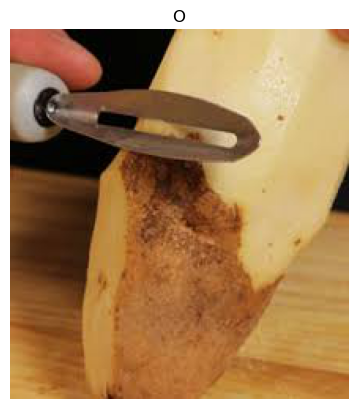

In [9]:
img_view = view_random_image(target_dir = train_dir, target_class = "O")

['R_755.jpg']
Image shape : (201, 251, 3)


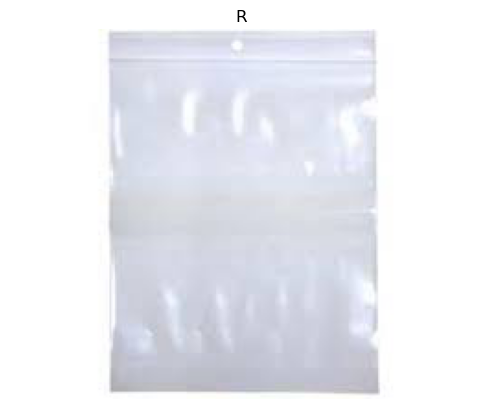

In [10]:
img_view = view_random_image(target_dir = train_dir, target_class = "R")

In [11]:
#bUILDING AN END-TO-END cnn

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#image data generator generate batches of tensor image data
#with real-time data augmentation
#The ImageDataGenerator class is a powerful tool in 
#TensorFlow for preprocessing and augmenting image data 
#during the training process. It allows you to apply 
#various transformations, such as rescaling, rotation, 
#shearing, zooming, and more, to the input images.

In [13]:
train_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)
#rescaling the pixel value of images in range[0,255] to [0,1]
#to normalize the input data before feeding it to neural ntwk
#rescaling factor. Defaults to None. If None or 0,
#no rescaling is applied, otherwise we multiply the data by
#the value provided (after applying all other transformations).




In [14]:
train_data = train_data_gen.flow_from_directory(directory = train_dir, target_size = (224,224),batch_size = 32,class_mode = "binary")
test_data = train_data_gen.flow_from_directory(directory = test_dir, target_size = (224,224),batch_size = 32,class_mode = "binary")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.activations import relu, sigmoid, softmax
from tensorflow.keras.optimizers import Adam

In [16]:
#CREATIMG MODEL

In [17]:
model_1 = tf.keras.Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                       epochs=20,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps = len(test_data))

Epoch 1/20
706/706 [==============================] - 696s 982ms/step - loss: 0.4577 - accuracy: 0.7910 - val_loss: 0.3438 - val_accuracy: 0.8715
Epoch 2/20
706/706 [==============================] - 650s 920ms/step - loss: 0.3859 - accuracy: 0.8343 - val_loss: 0.3699 - val_accuracy: 0.8687
Epoch 3/20
706/706 [==============================] - 469s 664ms/step - loss: 0.3379 - accuracy: 0.8584 - val_loss: 0.3189 - val_accuracy: 0.8766
Epoch 4/20
706/706 [==============================] - 459s 649ms/step - loss: 0.3061 - accuracy: 0.8767 - val_loss: 0.3253 - val_accuracy: 0.8750
Epoch 5/20
706/706 [==============================] - 440s 623ms/step - loss: 0.2762 - accuracy: 0.8894 - val_loss: 0.3948 - val_accuracy: 0.8548
Epoch 6/20
706/706 [==============================] - 452s 640ms/step - loss: 0.2383 - accuracy: 0.9057 - val_loss: 0.3861 - val_accuracy: 0.8599
Epoch 7/20
706/706 [==============================] - 463s 655ms/step - loss: 0.2102 - accuracy: 0.9191 - val_loss: 0.4099 -

In [18]:
#CONVOLUTION: apply filters to generate feature maps
#NON-LINEARITY: often ReLU
#POOLING: downsampling operation on each feature map

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [20]:
model_1.evaluate(test_data)

79/79 [==============================] - 17s 208ms/step - loss: 1.0190 - accuracy: 0.8245


[1.0189521312713623, 0.8245125412940979]

In [21]:
#plotting accuracy and loss curves

In [22]:
def plot_loss_curves(history):
    # get loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    # get accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    # epochs
    epochs =range(len(history.history["loss"]))
    # plot loss
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Val Loss")
    plt.title("Loss Curves")
    plt.xlabel("Epcohs")
    plt.legend()
    
    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, val_accuracy, label="Val Accuracy")
    plt.title("Accuracy Curves")
    plt.xlabel("Epochs")
    plt.legend();

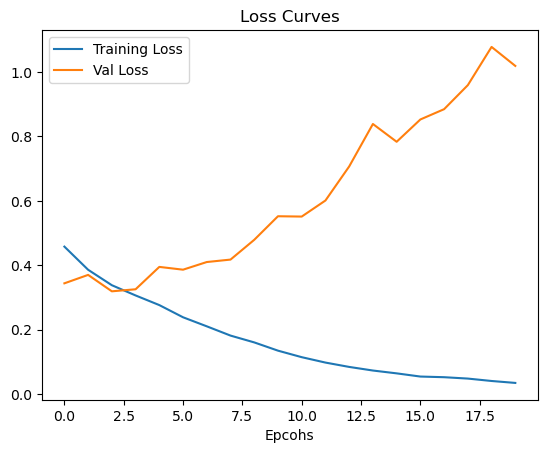

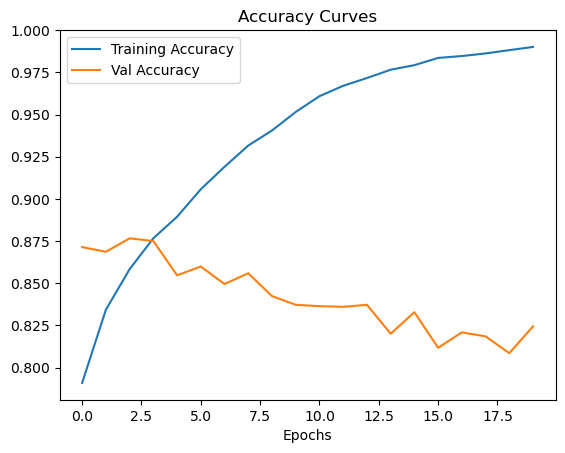

In [25]:
plot_loss_curves(history_1)

In [26]:
#Binary Cross-Entropy = - (y * log(p) + (1 - y) * log(1 - p))
#It measures the dissimilarity between the predicted 
#probabilities and the true binary labels of a 
#classification task.
#It helps to achieve faster convergence and better 
#performance compared to traditional gradient descent methods.
#gradient descend is an optimization technique to find min value
#of loss function by updating values of parameters until
#convergence after repeated iterations

In [27]:
#model prediction

In [28]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model_1.predict(img))#gives index of class with high probability
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 59ms/step
This image -> Recyclable


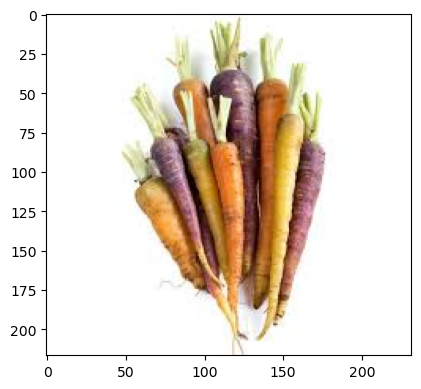

In [33]:
test_img = cv2.imread(r"C:\Users\User\Downloads\archive\DATASET\TEST\O\O_12574.jpg")
predict_func(test_img)